In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

training image preprocessing

In [58]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


validating image preprocessing

In [59]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [60]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [61]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break


tf.Tensor(
[[[[ 53.75  50.    50.75]
   [113.25 109.25 110.25]
   [117.5  113.5  114.5 ]
   ...
   [164.   161.   156.  ]
   [163.5  160.5  155.5 ]
   [162.5  159.5  154.5 ]]

  [[ 61.25  57.5   58.25]
   [116.75 112.75 113.75]
   [119.5  115.5  116.5 ]
   ...
   [166.25 163.25 158.25]
   [165.5  162.5  157.5 ]
   [165.   162.   157.  ]]

  [[ 58.5   54.75  55.5 ]
   [114.   110.   111.  ]
   [126.5  122.5  123.5 ]
   ...
   [164.75 161.75 156.75]
   [164.   161.   156.  ]
   [163.25 160.25 155.25]]

  ...

  [[ 58.    56.25  59.  ]
   [112.75 110.75 113.75]
   [128.   126.   129.  ]
   ...
   [113.5  110.5  103.5 ]
   [104.   101.    94.  ]
   [101.    98.    91.  ]]

  [[ 59.75  58.25  60.75]
   [125.5  123.5  126.5 ]
   [125.5  123.5  126.5 ]
   ...
   [110.25 107.25 100.25]
   [104.25 101.25  94.25]
   [105.25 102.25  95.25]]

  [[ 61.5   59.5   62.5 ]
   [121.   119.   122.  ]
   [122.5  120.5  123.5 ]
   ...
   [104.   101.    94.  ]
   [104.5  101.5   94.5 ]
   [106.25 103.25  9

Building Model

To avoid Overshooting
1. Choose small learning rate(default=0.001) , we will be taking 0.0001
2. There may be a chance of underfitting, so increase the number of neurons.
3. Add more convolutional layers to extraxt more features from images as there may be a possibility that the model might be unable to capture relevant features or model is cofusing due to lack of features, so, feed it with more features.

In [62]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [63]:
model = Sequential()

Building Convolution layer

In [64]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [65]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [66]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [67]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [68]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [69]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [70]:
model.add(Flatten())

In [71]:
model.add(Dense(units=1500, activation='relu'))

In [72]:
model.add(Dropout(0.4))

In [73]:
#Output layer
model.add(Dense(units=38, activation='softmax'))

Compiling Model

In [74]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model Trainning

In [76]:
training_history= model.fit(x=training_set, validation_data= validation_set, epochs=10)

Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7565s 3s/step - accuracy: 0.4025 - loss: 2.1239 - val_accuracy: 0.7911 - val_loss: 0.6941
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7225s 3s/step - accuracy: 0.8410 - loss: 0.5040 - val_accuracy: 0.8967 - val_loss: 0.3221
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13820s 6s/step - accuracy: 0.9074 - loss: 0.2886 - val_accuracy: 0.9402 - val_loss: 0.1928
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7002s 3s/step - accuracy: 0.9371 - loss: 0.1903 - val_accuracy: 0.9445 - val_loss: 0.1693
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10699s 5s/step - accuracy: 0.9511 - loss: 0.1484 - val_accuracy: 0.9426 - val_loss: 0.1868
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8793s 4s/step - accuracy: 0.9629 - loss: 0.1104 - val_accuracy: 0.9672 - val_loss: 0.1033
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7458s 3s/step - accuracy: 0.9726 - loss: 0.0837 - val_accuracy: 0.9607 - val_loss: 0.1274
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7106s 3s/step - accuracy: 0.9753 - loss: 0.

Model_Evaluation

In [84]:
# Model evaluation on training set
train_loss, train_acc = model.evaluate(training_set) 

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1861s 847ms/step - accuracy: 0.9948 - loss: 0.0173


In [85]:
print(train_loss, train_acc)

0.015715820714831352 0.995077908039093


In [86]:
# Model evaluation on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 426s 774ms/step - accuracy: 0.9713 - loss: 0.0989


In [87]:
print(val_loss, val_acc)

0.09948669373989105 0.970919668674469


Saving Model

In [89]:
model.save("trained_model.keras")

In [90]:
training_history.history

{'accuracy': [0.6094743609428406,
  0.8620812296867371,
  0.916409432888031,
  0.9421437978744507,
  0.9547336101531982,
  0.9651895761489868,
  0.9731702208518982,
  0.9762714505195618,
  0.9791592359542847,
  0.9831140041351318],
 'loss': [1.3287800550460815,
  0.4361995458602905,
  0.25897666811943054,
  0.17595337331295013,
  0.13518522679805756,
  0.10357488691806793,
  0.0820457935333252,
  0.07270779460668564,
  0.06207351014018059,
  0.053264595568180084],
 'val_accuracy': [0.7910881042480469,
  0.8966537714004517,
  0.9402458667755127,
  0.9445139765739441,
  0.9426360130310059,
  0.9672206044197083,
  0.9607329964637756,
  0.9630662202835083,
  0.9586842656135559,
  0.970919668674469],
 'val_loss': [0.6940727829933167,
  0.3220919072628021,
  0.19276827573776245,
  0.16926832497119904,
  0.18675602972507477,
  0.1033179759979248,
  0.12741519510746002,
  0.12511464953422546,
  0.14196419715881348,
  0.09948669373989105]}

In [91]:
# recording history in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)
    

Accuracy Visualization

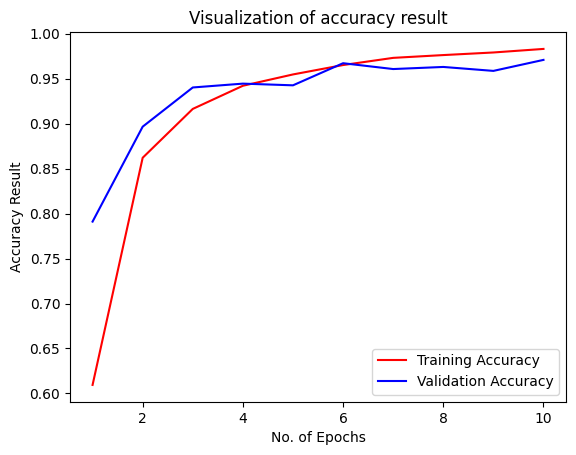

In [95]:
epochs = [i for i in range (1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [96]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [126]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle= False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [127]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape



550/550 ━━━━━━━━━━━━━━━━━━━━ 535s 972ms/step


(array([[9.9999994e-01, 7.0841749e-10, 2.7002101e-12, ..., 5.5623693e-19,
         7.2174129e-17, 6.4473501e-17],
        [9.9999529e-01, 4.3732090e-08, 8.3946225e-11, ..., 7.2577748e-16,
         1.1691269e-14, 3.9979731e-14],
        [9.9999994e-01, 3.7878009e-14, 2.3713591e-13, ..., 3.4481028e-21,
         1.1843381e-18, 3.8839616e-18],
        ...,
        [1.3062723e-15, 2.5976306e-18, 4.0731145e-14, ..., 2.9015183e-17,
         2.5922866e-17, 1.0000000e+00],
        [4.8931063e-12, 1.1949637e-15, 8.1378550e-12, ..., 7.2908103e-14,
         5.4007337e-15, 1.0000000e+00],
        [5.6540885e-17, 4.5686591e-20, 4.8774394e-17, ..., 4.1936987e-21,
         3.1907814e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [128]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [129]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [130]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2024-05-23 10:46:24.825898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [131]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

Now We will show Precision and Recall

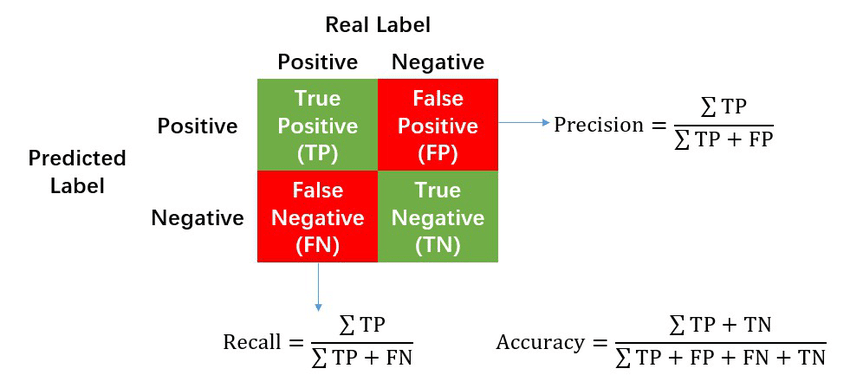

In [134]:
from sklearn.metrics import classification_report, confusion_matrix


In [133]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.97      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.96      0.96       440
                                   Apple___healthy       0.95      0.99      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

In [136]:
conf_mat = confusion_matrix(y_true, predicted_categories)
conf_mat

array([[480,   8,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 424, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 477]])

Confusion Matrix Visualization

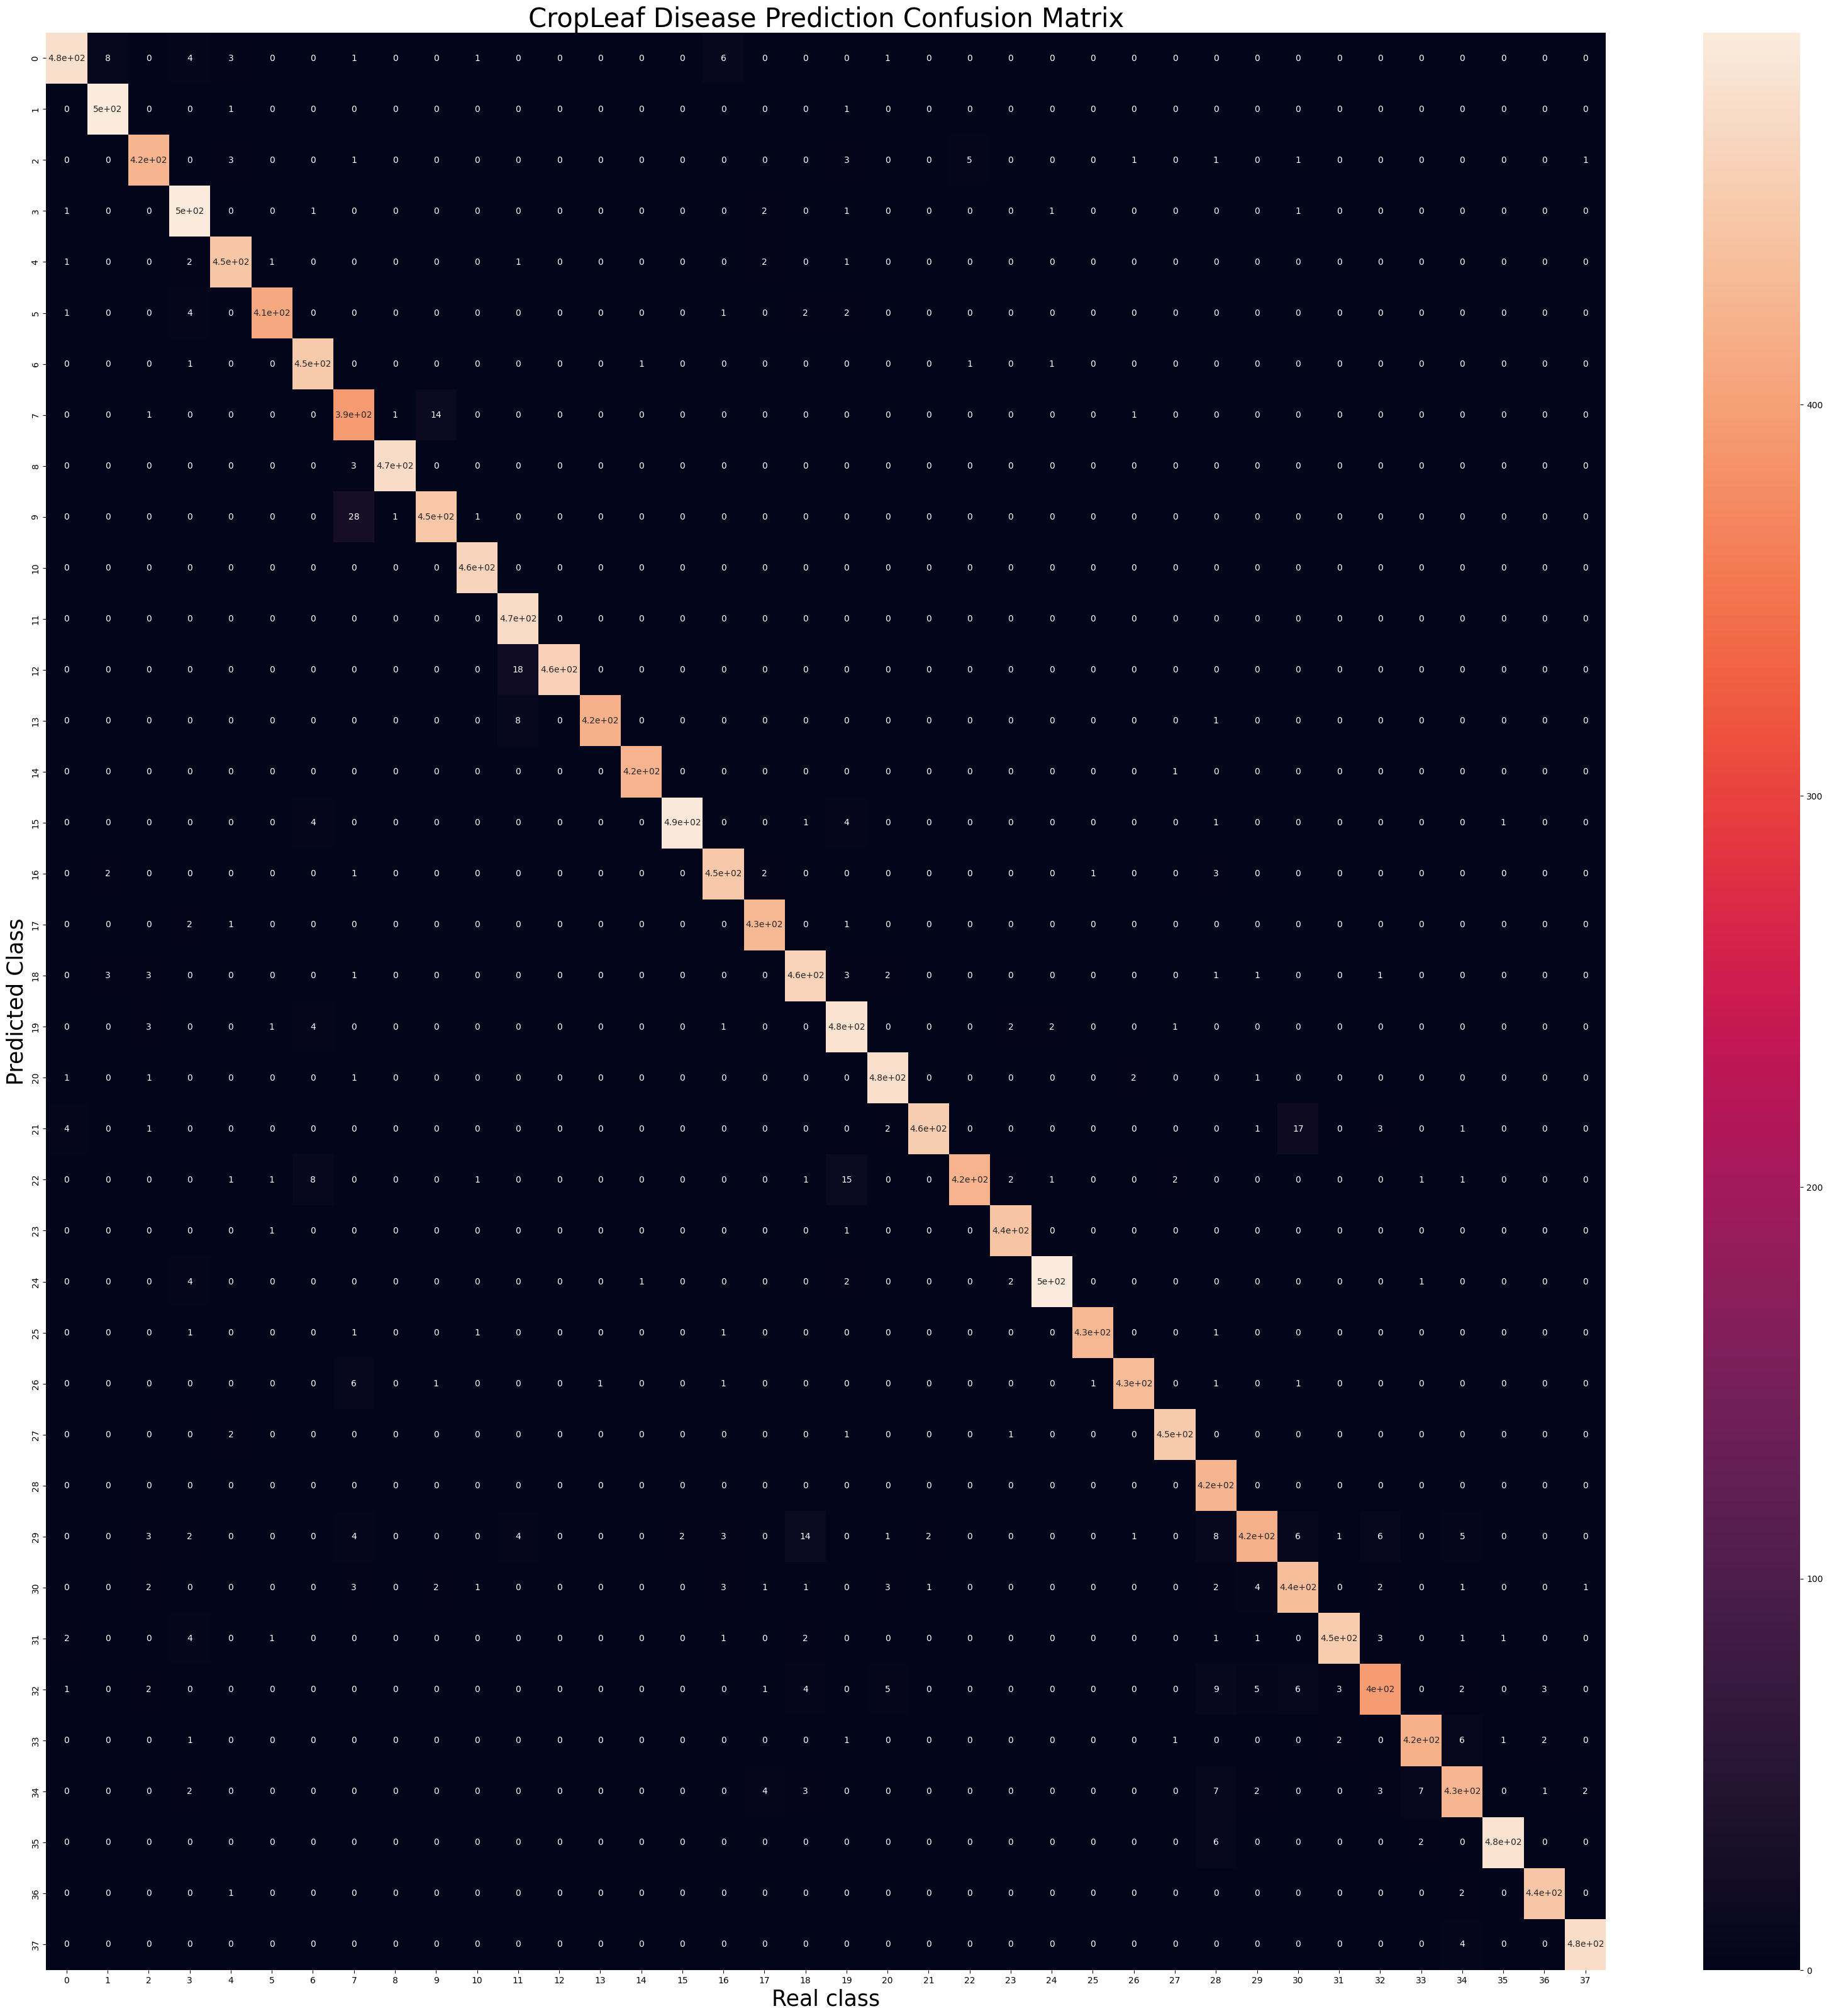

In [140]:
plt.figure(figsize=(40,40))
sns.heatmap(conf_mat, annot = True)
plt.xlabel("Real class", fontsize = 25)
plt.ylabel("Predicted Class", fontsize = 25)
plt.title("CropLeaf Disease Prediction Confusion Matrix", fontsize=30)
plt.show()